In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('HR.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1470 non-null   int64  
 1   Attrition                1470 non-null   int64  
 2   BusinessTravel           1470 non-null   int64  
 3   DailyRate                1470 non-null   int64  
 4   Department               1470 non-null   int64  
 5   DistanceFromHome         1470 non-null   int64  
 6   EducationField           1470 non-null   float64
 7   EnvironmentSatisfaction  1470 non-null   int64  
 8   JobInvolvement           1470 non-null   int64  
 9   JobLevel                 1470 non-null   int64  
 10  JobRole                  1470 non-null   int64  
 11  JobSatisfaction          1470 non-null   int64  
 12  MaritalStatus            1470 non-null   int64  
 13  MonthlyIncome            1470 non-null   float64
 14  OverTime                

In [3]:
df.drop(['Unnamed: 0'],axis = 1,inplace = True)
df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsWithCurrManager
0,1,1,1102,2,1,1.0,2,3,2,7,4,2,5993.0,1,0,0,1,4.0,5.0
1,0,2,279,1,8,1.0,3,2,2,6,2,1,5130.0,2,1,3,3,7.0,7.0
2,1,1,1373,1,2,5.0,4,2,1,2,3,2,2090.0,1,0,3,3,0.0,0.0
3,0,2,1392,1,3,1.0,4,3,1,6,3,1,2909.0,1,0,3,3,7.0,0.0
4,0,1,591,1,2,2.0,1,3,1,2,2,1,3468.0,2,1,3,3,2.0,2.0


In [4]:
x=df.drop(['Attrition'],axis=1)
y=df.Attrition

# standard scaling

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 8)

In [10]:
from sklearn import svm
svc = svm.SVC(class_weight='balanced', probability=True)
model_svc = svc.fit(X_train,y_train)
model_svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [11]:
y_pred = model_svc.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,auc,roc_curve

In [13]:
accuracy_score(y_test,y_pred)

0.7108843537414966

In [14]:
print(confusion_matrix(y_test,y_pred))

[[183  68]
 [ 17  26]]


In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81       251
           1       0.28      0.60      0.38        43

    accuracy                           0.71       294
   macro avg       0.60      0.67      0.60       294
weighted avg       0.82      0.71      0.75       294



In [16]:
roc_auc_score(y_test,y_pred)

0.6668674140646715

In [17]:
y_pred_prob = model_svc.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])
roc_auc = auc(fpr,tpr)
roc_auc

0.6557027703140924

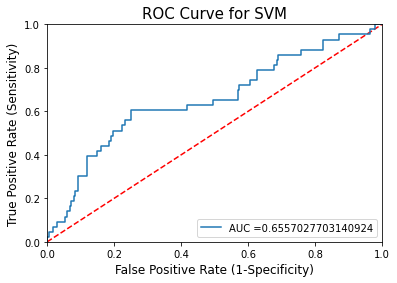

In [18]:
plt.title('ROC Curve for SVM',size = 15)
plt.xlabel('False Positive Rate (1-Specificity)',size = 12)
plt.ylabel('True Positive Rate (Sensitivity)',size = 12)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' +str(roc_auc))
plt.legend(loc=4) #Location of label
plt.show()